# Chapter 3 - Regression Models
## Segment 2 - Multiple linear regression

### Objective:

We are going to find out if undergraduate college enrollment in each year at the University of New Mexico can be predicted from other variables such as unemployment rate, highschool graduation rate, and income in the state of New Mexico in each year. This data is available from 1961 to 1989. We will use a multiple linear regression model.



### Importing required libraries, including the linear regression:

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from pylab import rcParams

import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import scale

In [2]:
%matplotlib inline
rcParams['figure.figsize'] = 5, 4

In [3]:
import seaborn as sb

sb.set_style('whitegrid')
from collections import Counter

### (Multiple) linear regression on the enrollment data

### Reading and preparing the input data 

In [5]:
address = './enrollment_forecast.csv'

enroll = pd.read_csv(address)
enroll.columns = ['year', 'roll', 'unem', 'hgrad', 'inc']
enroll.head()

,year,roll,unem,hgrad,inc
0,1,5501,8.1,9552,1923
1,2,5945,7.0,9680,1961
2,3,6629,7.3,9731,1979
3,4,7556,7.5,11666,2030
4,5,8716,7.0,14675,2112


Here, "roll" indicates the enrollment numbers, "unem" indicates the local unemployment in that year, "hgrad" is the graduation rate, and then "inc" is the local income in the region during that year.
This data starts at year 1961, so "year" 1 is actually 1961.


### Verifying that Linear Regression assumptions are met:
- All variables are continuous numeric, and not categorical.
- Data is free of outliers and missing values.
- A linear relationship exists between predictors and the response.
- All predictors are independent of each other.



### Checking if there is a linear relationship between each predictor and the predictant:

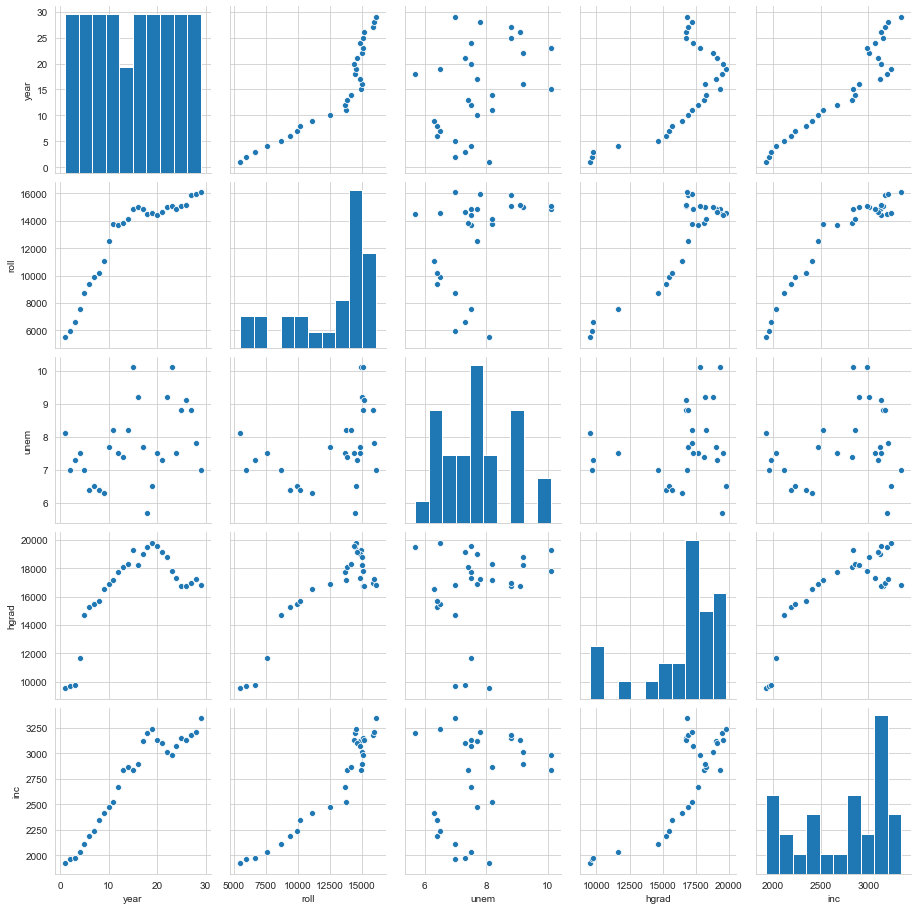

In [6]:
sb.pairplot(enroll)

- Let's look at the hgrad and roll linear pair. There definitely is a linear relationship.
- There may be a linear relationship of some sort between unem and roll, but it could be a lot stronger. But we just consider this good enough and see how unemployment does as a predictor of enrollment. The reason for selecting this variable and not others will soon be revealed. 

### Checking if all the variables are continuous numeric:
By looking at the distribution of variables in the above pair plots, we can say that this assumption is satisfied. 

### Checking if all the predictors are indipendent of each other:

In [7]:
print(enroll.corr())

           year      roll      unem     hgrad       inc
year   1.000000  0.900934  0.378305  0.670300  0.944287
roll   0.900934  1.000000  0.391344  0.890294  0.949876
unem   0.378305  0.391344  1.000000  0.177376  0.282310
hgrad  0.670300  0.890294  0.177376  1.000000  0.820089
inc    0.944287  0.949876  0.282310  0.820089  1.000000


- Based on the correlations, we see that not all predictors are independent. For example, inc and hgrad are highly correlated: higher income leads to higher graduation rate. In addition, year is highly correlated with hgrad and inc, meaning over the years, both graduation rate and income has increased.
- However, unem and hgrad have low correlation, therefore we keep these two variables.

In [8]:
enroll_data = enroll[['unem', 'hgrad']].values
enroll_target = enroll['roll'].values
enroll_data_names = ['unem', 'hgrad']

X, y = scale(enroll_data), enroll_target 

### Checking for missing values:

In [9]:
missing_values = X == np.nan
X[missing_values == True]

array([], dtype=float64)

### Implementing the linear regression model:

In [10]:
LinReg = LinearRegression(normalize = True)
LinReg.fit(X, y) 
print(LinReg.score(X, y))

0.8488812666133723


- So this model has a score value of 85%, which isn't too bad for this introductory model.
- The score vlaue is the R square of the prediction. 
- It's a measure of how well the prediction from our linear regression model actually matches the real values of college enrollment. 
- A practical maximum good score would be .99 and a practical minimum score would be .01. If you see a value of one or zero, then something is not right.  

### Predicting enrollment rate for year 1990

First, let's retrieve coefficients and intercept of our linear model:

In [11]:
LinReg.coef_[0], LinReg.coef_[1], LinReg.intercept_

(770.6231475896099, 2710.0068155312542, 12707.034482758621)

Recall the equation for linear regression:

roll = unem x LinReg.coef_[0] + hgrad x LinReg.coef_[1] + LinReg.intercept_

The normalized unemployment and graduation rate for the year 1990 is:

In [12]:
X_1990 = [-0.517,  0.346]

And the predicted enrollment rate for this year can be calculated as:

In [13]:
y_1990 = X_1990[0] * LinReg.coef_[0] + X_1990[1] * LinReg.coef_[1] + LinReg.intercept_
y_1990

13246.284673628606

And here is the real value to compare that with prediction from the model: 16170